In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import tree
import matplotlib.pyplot as plt
import pickle
import plotly.express as px

In [3]:
df_scaled = pd.read_csv("Data/sleep_efficiency_scaled_temps_2.csv")
df_scaled.drop(['Unnamed: 0'], axis=1)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Date,Max temp,Min temp
0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6,2021-03-06,0.210863,0.105263
1,138,0.450000,1,2021-03-06 02:00:00,2021-03-06 09:00:00,7.0,0.77,22,65,13,0.50,0.000,0.0,1,0.6,2021-03-06,0.210863,0.105263
2,233,0.450000,0,2021-03-06 23:00:00,2021-03-06 04:00:00,5.0,0.87,22,65,13,0.25,0.125,0.2,0,0.0,2021-03-06,0.210863,0.105263
3,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6,2021-12-05,0.258786,0.355263
4,196,0.866667,0,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.67,23,23,54,0.50,0.250,1.0,0,0.0,2021-12-05,0.258786,0.355263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,436,0.516667,0,2021-02-12 22:00:00,2021-02-12 05:00:00,7.0,0.96,28,57,15,0.00,0.000,0.0,0,0.6,2021-02-12,0.073482,0.070175
448,437,0.833333,1,2021-06-10 21:30:00,2021-06-10 05:30:00,8.0,0.72,27,55,18,0.50,0.000,0.6,0,0.6,2021-06-10,0.744409,0.837719
449,446,0.350000,0,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,1.00,0.250,0.4,1,0.2,2021-11-16,0.386581,0.289474
450,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0,2021-11-13,0.396166,0.614035


In [130]:
def LinearRegression_1():
    X = df_scaled[['Age', 'Gender', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 
                      'Light sleep percentage', 'Awakenings', 
                      'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
    y = df_scaled['Sleep efficiency']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    mse_scores = -cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    return round(mean_mse, 5)

def LinearRegression_2():
    X = df_scaled[['Age', 'Gender','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency', 'Min temp', 'Max temp']]
    y = df_scaled['Sleep efficiency'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    mse_scores = -cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    return round(mean_mse, 5)

def LinearRegression_3():
    X = df_scaled[['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
    y = df_scaled['Sleep efficiency']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    mse_scores = -cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    return round(mean_mse, 5)

MSE_L_all_values, MSE_L_without_sleep_percentages, MSE_L_best_features = LinearRegression_1(), LinearRegression_2(), LinearRegression_3()
MSE_L_all_values, MSE_L_without_sleep_percentages, MSE_L_best_features

(0.00414, 0.01296, 0.01258)

In [204]:
#Make function for train and test data regressor
def train_test_dt_regressor(): 
    X = df_scaled[['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
    y = df_scaled['Sleep efficiency']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test 

#Define train en test data
X_train, X_test, y_train, y_test = train_test_dt_regressor()

#Decision Tree without hyperparamater tuning
def DecisionTree():
    mse_scores = -cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    return round(mean_mse, 5)

MSE_DTR_best_features = DecisionTree()
MSE_DTR_best_features

0.01523

In [205]:
# #Decison Tree with hyperparameter tuning
# dt_regressor = DecisionTreeRegressor()

# #Define possible hyperparameter for Decision Tree Regressor
# dt_regressor_parameters = {
#     "criterion" : ['squared_error'],
#     "max_depth" : [1, 2, 3, 4, 5, 6, 7],
#     "min_samples_leaf" : [number for number in range(1, 7)], 
#     "max_leaf_nodes" : [None, 5, 10, 20, 30, 40, 50], 
#     "splitter" : ['best', 'random'], 
#     "max_features" : ["auto", 1, 2, 3, 4, 5]}

# #Perform GridSearchCV
# dt_regressor_tuning_model = GridSearchCV(dt_regressor, param_grid = dt_regressor_parameters, scoring = 'neg_mean_squared_error', cv = 5, verbose = 0, return_train_score=False)
# dt_regressor_tuning_model.fit(X_train, y_train)

# # Create a Pandas DataFrame with the hyperparameters and their corresponding scores
# df_dt_regressor = pd.DataFrame(dt_regressor_tuning_model.cv_results_)[['params', 'mean_test_score']]

# #Dump Pandas DataFrame with the hyperparameters and their corresponding scores to pickle file (so you can use this file later)
# with open('results_dt_regressor_tuning.pickle', 'wb') as f:
#     pickle.dump(df_dt_regressor, f)

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'

In [206]:
with open('results_dt_regressor_tuning.pickle', 'rb') as f:
    df_dt_regressor = pickle.load(f)

best_params_dt_regressor = df_dt_regressor.sort_values('mean_test_score', ascending=False).iloc[0][['params', 'mean_test_score']]
best_params_dt_regressor['params'], best_params_dt_regressor['mean_test_score']    

top_scores = df_dt_regressor.nlargest(25, 'mean_test_score').reset_index() 
top_scores['mean_test_score'] = round(top_scores['mean_test_score'], 5) 
results = []
for i in range(len(top_scores['params'])):
    result = {}
    for key in top_scores['params'][i].keys():
        result[key] = top_scores['params'][i][key]
    result['mean_test_score'] = top_scores['mean_test_score'][i]
    results.append(result)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)
results_df['criterion'].replace({'squared_error': 0, 'absolute_error': 1}, inplace=True)
results_df['splitter'].replace({'best': 0, 'random': 1}, inplace=True)
results_df['max_features'].replace("auto", 0, inplace=True)
results_df['max_leaf_nodes'] = results_df['max_leaf_nodes'].fillna(0)
results_df = results_df.reindex(columns=['criterion', 'splitter', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_leaf', 'mean_test_score'])

In [207]:
best_params_dt_regressor['params'], best_params_dt_regressor['mean_test_score']

({'criterion': 'squared_error',
  'max_depth': 6,
  'max_features': 3,
  'max_leaf_nodes': 30,
  'min_samples_leaf': 4,
  'splitter': 'best'},
 -0.009577081408625242)

In [208]:
fig = px.parallel_coordinates(results_df, color="mean_test_score",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2,
                             range_color=(-0.01, -0.00955))
fig.show()
print("Criterion:" + "\n" + "0 = Mean Squared Error" + "\n\n" + "Splitter: " + "\n" + "0 = Best or 1 = Random" + "\n\n" + "Max Features: "+ "\n" + "0 = auto" )

Criterion:
0 = Mean Squared Error

Splitter: 
0 = Best or 1 = Random

Max Features: 
0 = auto


In [133]:
#Make function for train and test data regressor
def train_test_svr(): 
    X = df_scaled[['Age', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
    y = df_scaled['Sleep efficiency']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test 

#Define train en test data
X_train, X_test, y_train, y_test = train_test_svr()

#Support Vector Regression without hyperparamater tuning
def SupportVectorRegression():
    mse_scores = -cross_val_score(SVR(), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    return round(mean_mse, 5)

MSE_SVR_best_features = SupportVectorRegression()
MSE_SVR_best_features

0.01076

In [69]:
# #Support Vector Regression with hyperparameter tuning
# svr = SVR()

# #Define possible hyperparameter for Decision Tree Regressor
# svr_parameters = {
#     "kernel": ['linear', 'poly', 'rbf'],
#     'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'epsilon': [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 8, 9, 10]}

# #Perform GridSearchCV
# svr_tuning_model = GridSearchCV(svr, param_grid = svr_parameters, scoring = 'neg_mean_squared_error', cv = 5, verbose = 0, return_train_score=False)
# svr_tuning_model.fit(X_train, y_train)

# # Create a Pandas DataFrame with the hyperparameters and their corresponding scores
# df_svr = pd.DataFrame(svr_tuning_model.cv_results_)[['params', 'mean_test_score']]

# #Dump Pandas DataFrame with the hyperparameters and their corresponding scores to pickle file (so you can use this file later)
# with open('results_svr_tuning.pickle', 'wb') as f:
#     pickle.dump(df_svr, f)

In [178]:
with open('results_svr_tuning.pickle', 'rb') as f:
    df_svr = pickle.load(f)

best_params_svr= df_svr.sort_values('mean_test_score', ascending=False).iloc[0][['params', 'mean_test_score']]
best_params_svr['params'], best_params_svr['mean_test_score']    

top_scores_svr = df_svr.nlargest(25, 'mean_test_score').reset_index()   
top_scores_svr['mean_test_score'] = round(top_scores_svr['mean_test_score'], 5) 
results = []
for i in range(len(top_scores_svr['params'])):
    result = {}
    for key in top_scores_svr['params'][i].keys():
        result[key] = top_scores_svr['params'][i][key]
    result['mean_test_score'] = top_scores_svr['mean_test_score'][i]
    results.append(result)

# Create a DataFrame from the list of dictionaries
results_df_svr = pd.DataFrame(results)
results_df_svr['kernel'].replace({'rbf': 0, 'poly': 1}, inplace=True)
results_df_svr = results_df_svr.reindex(columns=['kernel', 'epsilon', 'C', 'mean_test_score'])

In [210]:
best_params_svr['params'], best_params_svr['mean_test_score'] 

({'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, -0.01056063931965594)

In [209]:
fig = px.parallel_coordinates(results_df_svr, color="mean_test_score",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2,
                             range_color=(-0.0118, -0.0105))
fig.show()
print("Kernel:" + "\n" + "0 = RBF or 1 = Poly" + "\n")

Kernel:
0 = RBF or 1 = Poly



In [228]:
#Make function for train and test data regressor
def train_test_dt_classifier(): 
    bins = [0, 0.74, 1]
    labels = [0, 1] #0: Bad, 1: Good
    df_grouped = df_scaled.copy()
    df_grouped['sleep_efficiency_group'] = pd.cut(df_grouped['Sleep efficiency'], bins, labels = labels, include_lowest = True)
    X = df_grouped[['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
    y = df_grouped['sleep_efficiency_group']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test 

#Define train en test data
X_train, X_test, y_train, y_test = train_test_dt_classifier()

#Support Vector Regression without hyperparamater tuning
def dt_classfier():
    mse_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring='precision')
    mean_mse = np.mean(mse_scores)
    return round(mean_mse, 5)

MSE_dt_classifier_best_features = dt_classfier()
MSE_dt_classifier_best_features

0.839

In [229]:
#Decison Tree with hyperparameter tuning
dt_classifier = DecisionTreeClassifier()

#Define possible hyperparameter for Decision Tree Regressor
dt_classifier_parameters = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7],
    "min_samples_leaf" : [number for number in range(1, 7)], 
    "max_leaf_nodes" : [None, 5, 10, 20, 30, 40, 50], 
    "splitter" : ['best', 'random'], 
    "max_features" : ["auto", 1, 2, 3, 4, 5]}

#Perform GridSearchCV
dt_classifier_tuning_model = GridSearchCV(dt_classifier, param_grid = dt_classifier_parameters, scoring = 'precision', cv = 5, verbose = 0, return_train_score=False)
dt_classifier_tuning_model.fit(X_train, y_train)

# Create a Pandas DataFrame with the hyperparameters and their corresponding scores
df_dt_classifier = pd.DataFrame(dt_classifier_tuning_model.cv_results_)[['params', 'mean_test_score']]

#Dump Pandas DataFrame with the hyperparameters and their corresponding scores to pickle file (so you can use this file later)
with open('results_dt_classifier_tuning.pickle', 'wb') as f:
    pickle.dump(df_dt_classifier, f)

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Users/kyrajongman/Library/Python/3.9/lib/python/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

In [230]:
with open('results_dt_classifier_tuning.pickle', 'rb') as f:
    df_dt_classifier = pickle.load(f)

best_params_dt_classifier = df_dt_classifier.sort_values('mean_test_score', ascending=False).iloc[0][['params', 'mean_test_score']]
best_params_dt_classifier['params'], best_params_dt_classifier['mean_test_score']    

top_scores_classifier = df_dt_classifier.nlargest(25, 'mean_test_score').reset_index()   
top_scores_classifier['mean_test_score'] = round(top_scores_classifier['mean_test_score'], 5) 
results = []
for i in range(len(top_scores_classifier['params'])):
    result = {}
    for key in top_scores_classifier['params'][i].keys():
        result[key] = top_scores_classifier['params'][i][key]
    result['mean_test_score'] = top_scores_classifier['mean_test_score'][i]
    results.append(result)

# Create a DataFrame from the list of dictionaries
results_df_classifier = pd.DataFrame(results)
results_df_classifier['criterion'].replace({'gini': 0, 'entropy': 1}, inplace=True)
results_df_classifier['splitter'].replace({'best': 0, 'random': 1}, inplace=True)
results_df_classifier['max_features'].replace("auto", 0, inplace=True)
results_df_classifier['max_leaf_nodes'].fillna(0, inplace=True)
results_df_classifier = results_df_classifier.reindex(columns=['criterion', 'splitter', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_leaf', 'mean_test_score'])

In [231]:
best_params_dt_classifier['params'], best_params_dt_classifier['mean_test_score']    

({'criterion': 'gini',
  'max_depth': 6,
  'max_features': 4,
  'max_leaf_nodes': None,
  'min_samples_leaf': 2,
  'splitter': 'best'},
 0.8767943748757702)

In [233]:
fig = px.parallel_coordinates(results_df_classifier, color="mean_test_score",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2,
                             range_color=(0.85, 0.885))
fig.show()
print("Criterion:" + "\n" + "0 = Gini or 1 = Entropy" + "\n\n" + "Splitter: " + "\n" + "0 = Best or 1 = Random" + "\n\n" + "Max Features: "+ "\n" + "0 = auto" )

Criterion:
0 = Gini or 1 = Entropy

Splitter: 
0 = Best or 1 = Random

Max Features: 
0 = auto


In [ ]:
def Bold(word):
    return ("\033[1m{}\033[00m".format(word))

def make_table():
    table = [
        [Bold('Model'), Bold('Mean Squared Error or Precision (5-fold)'), Bold('Hyperparameter Tuning')], 
        ['Linear Regression (with all independent values)', MSE_L_all_values, '-'], 
        ['Linear Regression (with weather temperatures)', MSE_L_without_sleep_percentages, '-'], 
        ['Linear Regression (with best features)', MSE_L_best_features, '-'], 
        ['Decision Tree Regression (with best features)', MSE_DTR_best_features, str(best_params_dt_regressor['mean_test_score']).split("-")[1]], 
        ['Support Vector Regression (with best features)', MSE_SVR_best_features, str(best_params_svr['mean_test_score']).split("-")[1]], 
        ['Decision Tree Classifier (with best features and groups bad & good)', MSE_dt_classifier_best_features, best_params_dt_classifier['mean_test_score']]
    ]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

make_table()

╒═════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════╤═════════════════════════╕
│ Model                                                               │   Mean Squared Error or Percision (5-fold) │ Hyperparameter Tuning   │
╞═════════════════════════════════════════════════════════════════════╪════════════════════════════════════════════╪═════════════════════════╡
│ Linear Regression (with all independent values)                     │                                    0.00414 │ -                       │
├─────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────┼─────────────────────────┤
│ Linear Regression (with weather temperatures)                       │                                    0.01296 │ -                       │
├─────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────┼─────────────────────────┤

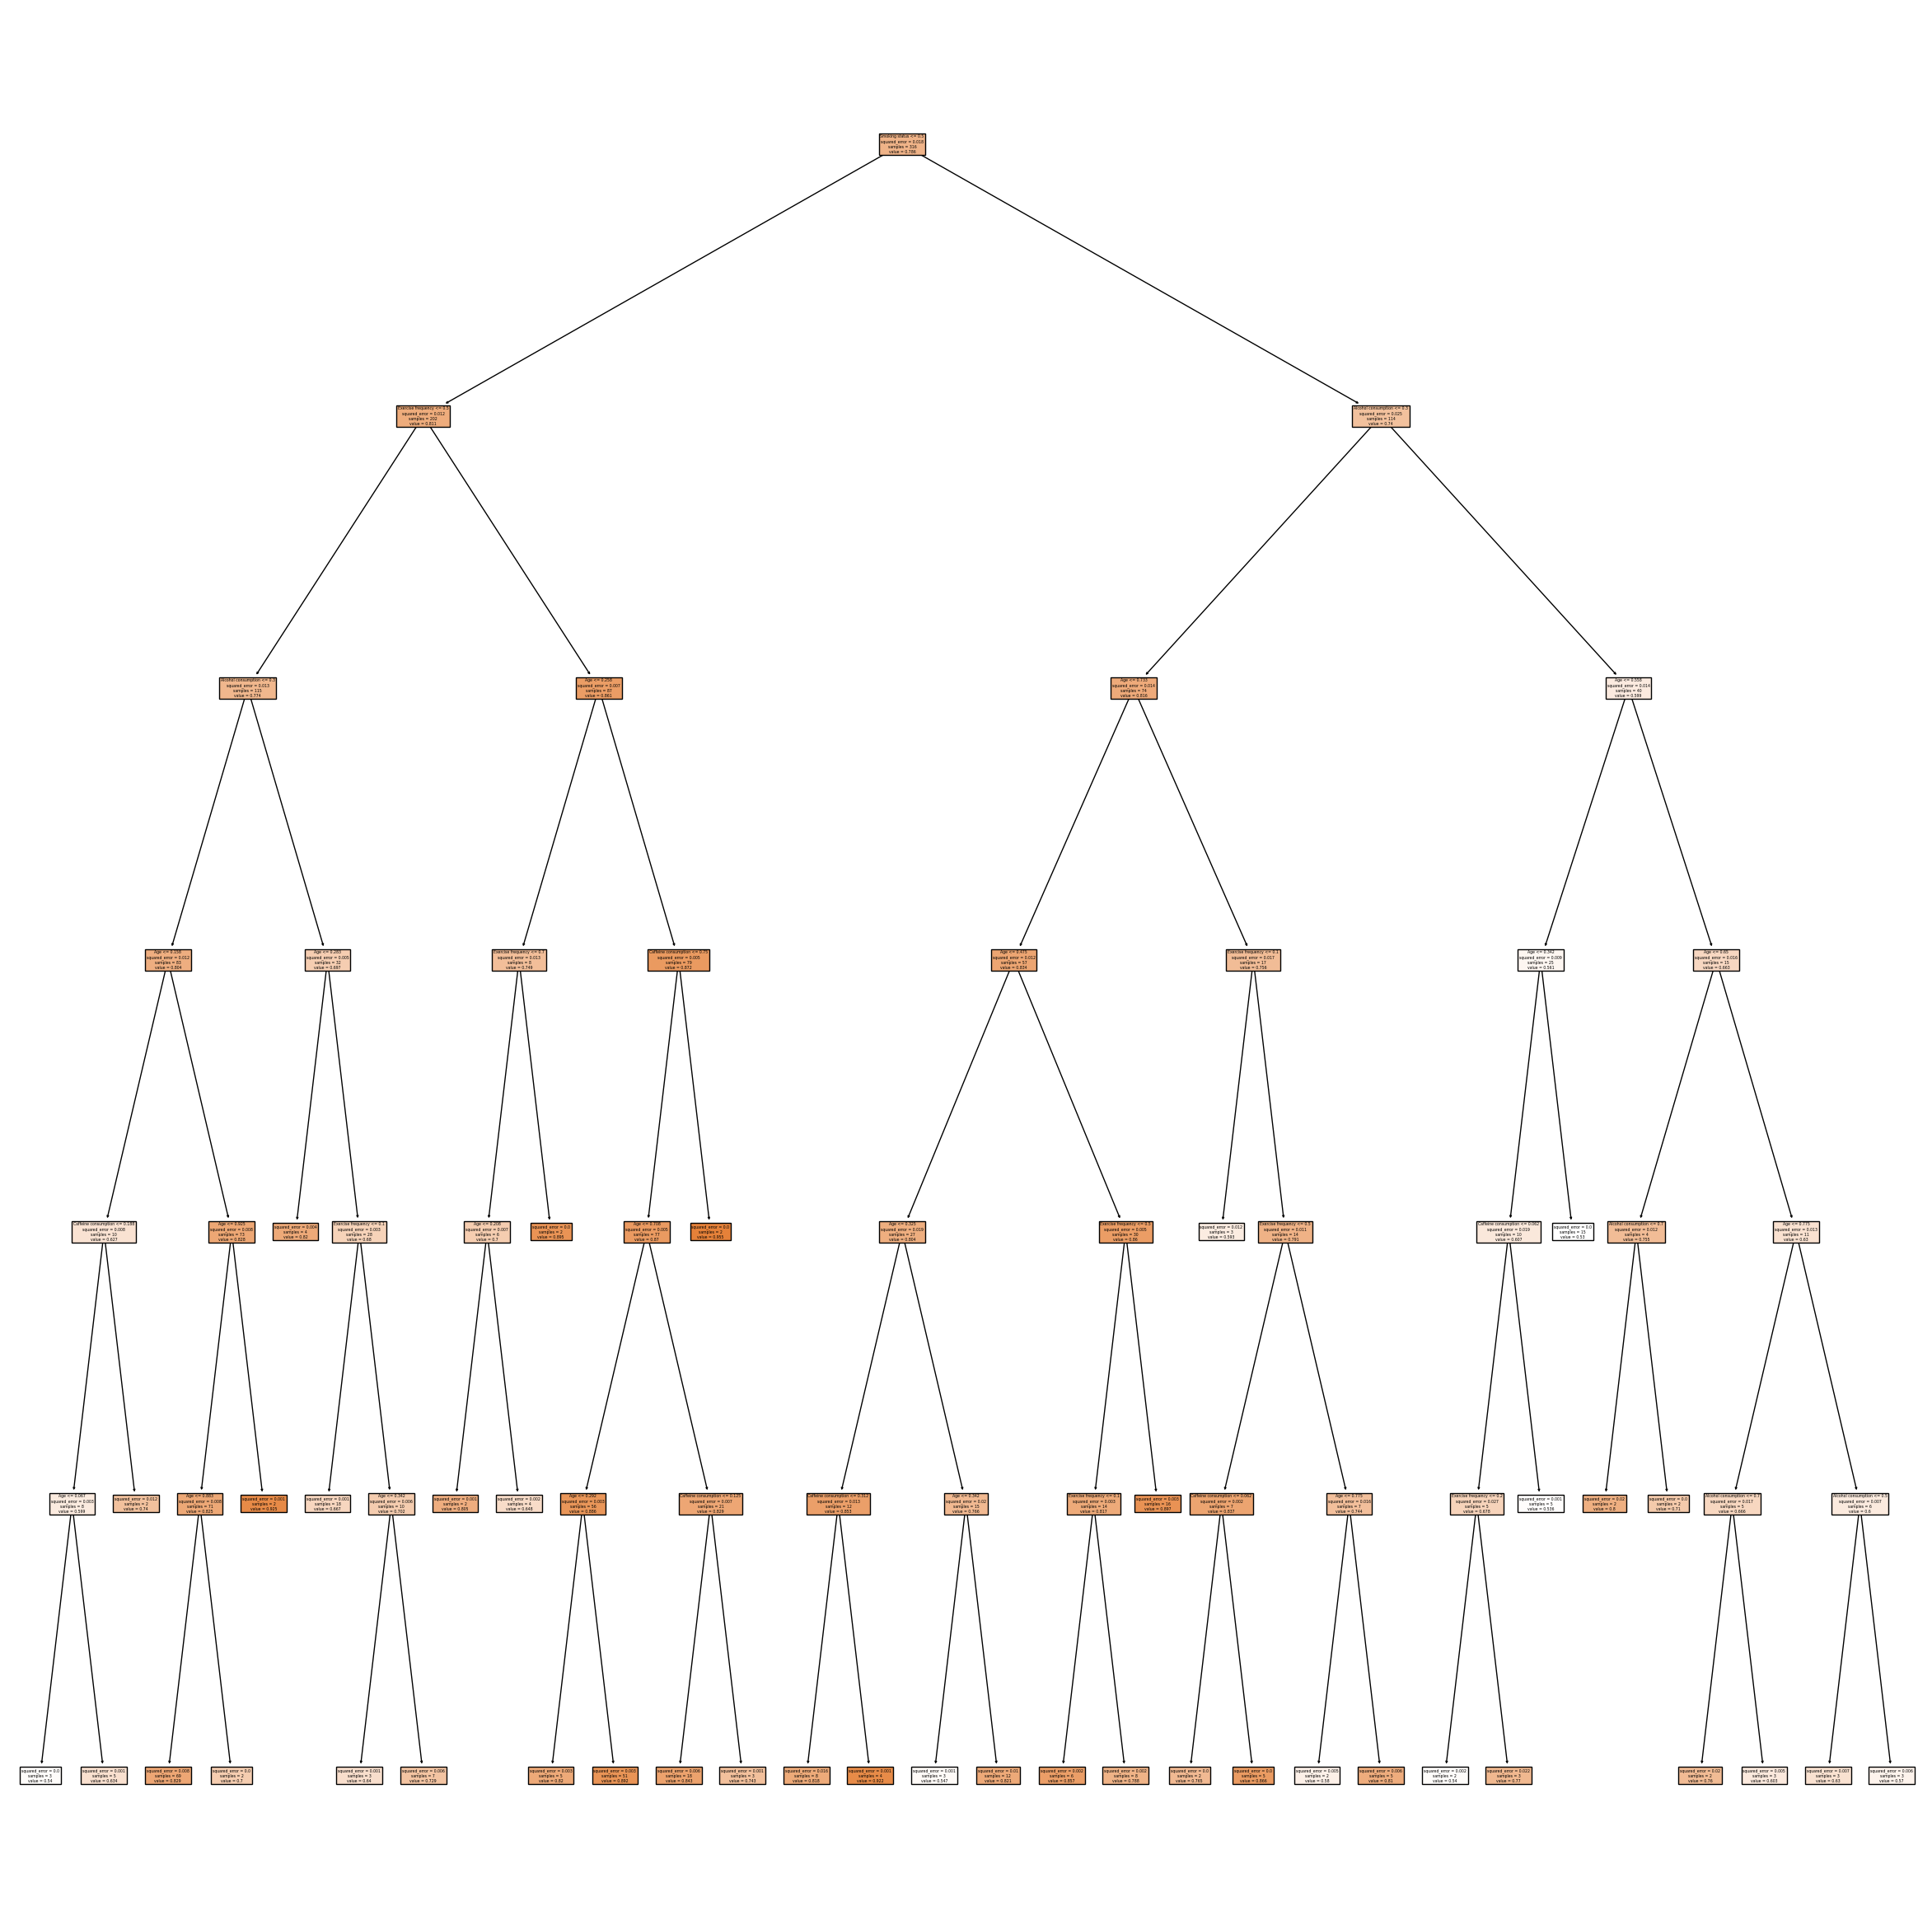

In [147]:
#Making graph for Decison Tree Regression with best features and parameters 
df_regression = df_scaled.copy()
X = df_regression[['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
y = df_regression['Sleep efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

parameters = best_params_dt_regressor['params']
drg = DecisionTreeRegressor(criterion= parameters['criterion'], max_depth= parameters['max_depth'], max_features= parameters['max_features'], max_leaf_nodes= parameters['max_leaf_nodes'],
                             min_samples_leaf= parameters['min_samples_leaf'], splitter= parameters['splitter'])
drg = drg.fit(X_train, y_train)
y_pred_cat = drg.predict(X_test)

plt.figure(figsize=(30, 30))
fn = ['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
tree.plot_tree(drg, 
               feature_names = fn,
               filled=True)
plt.show()

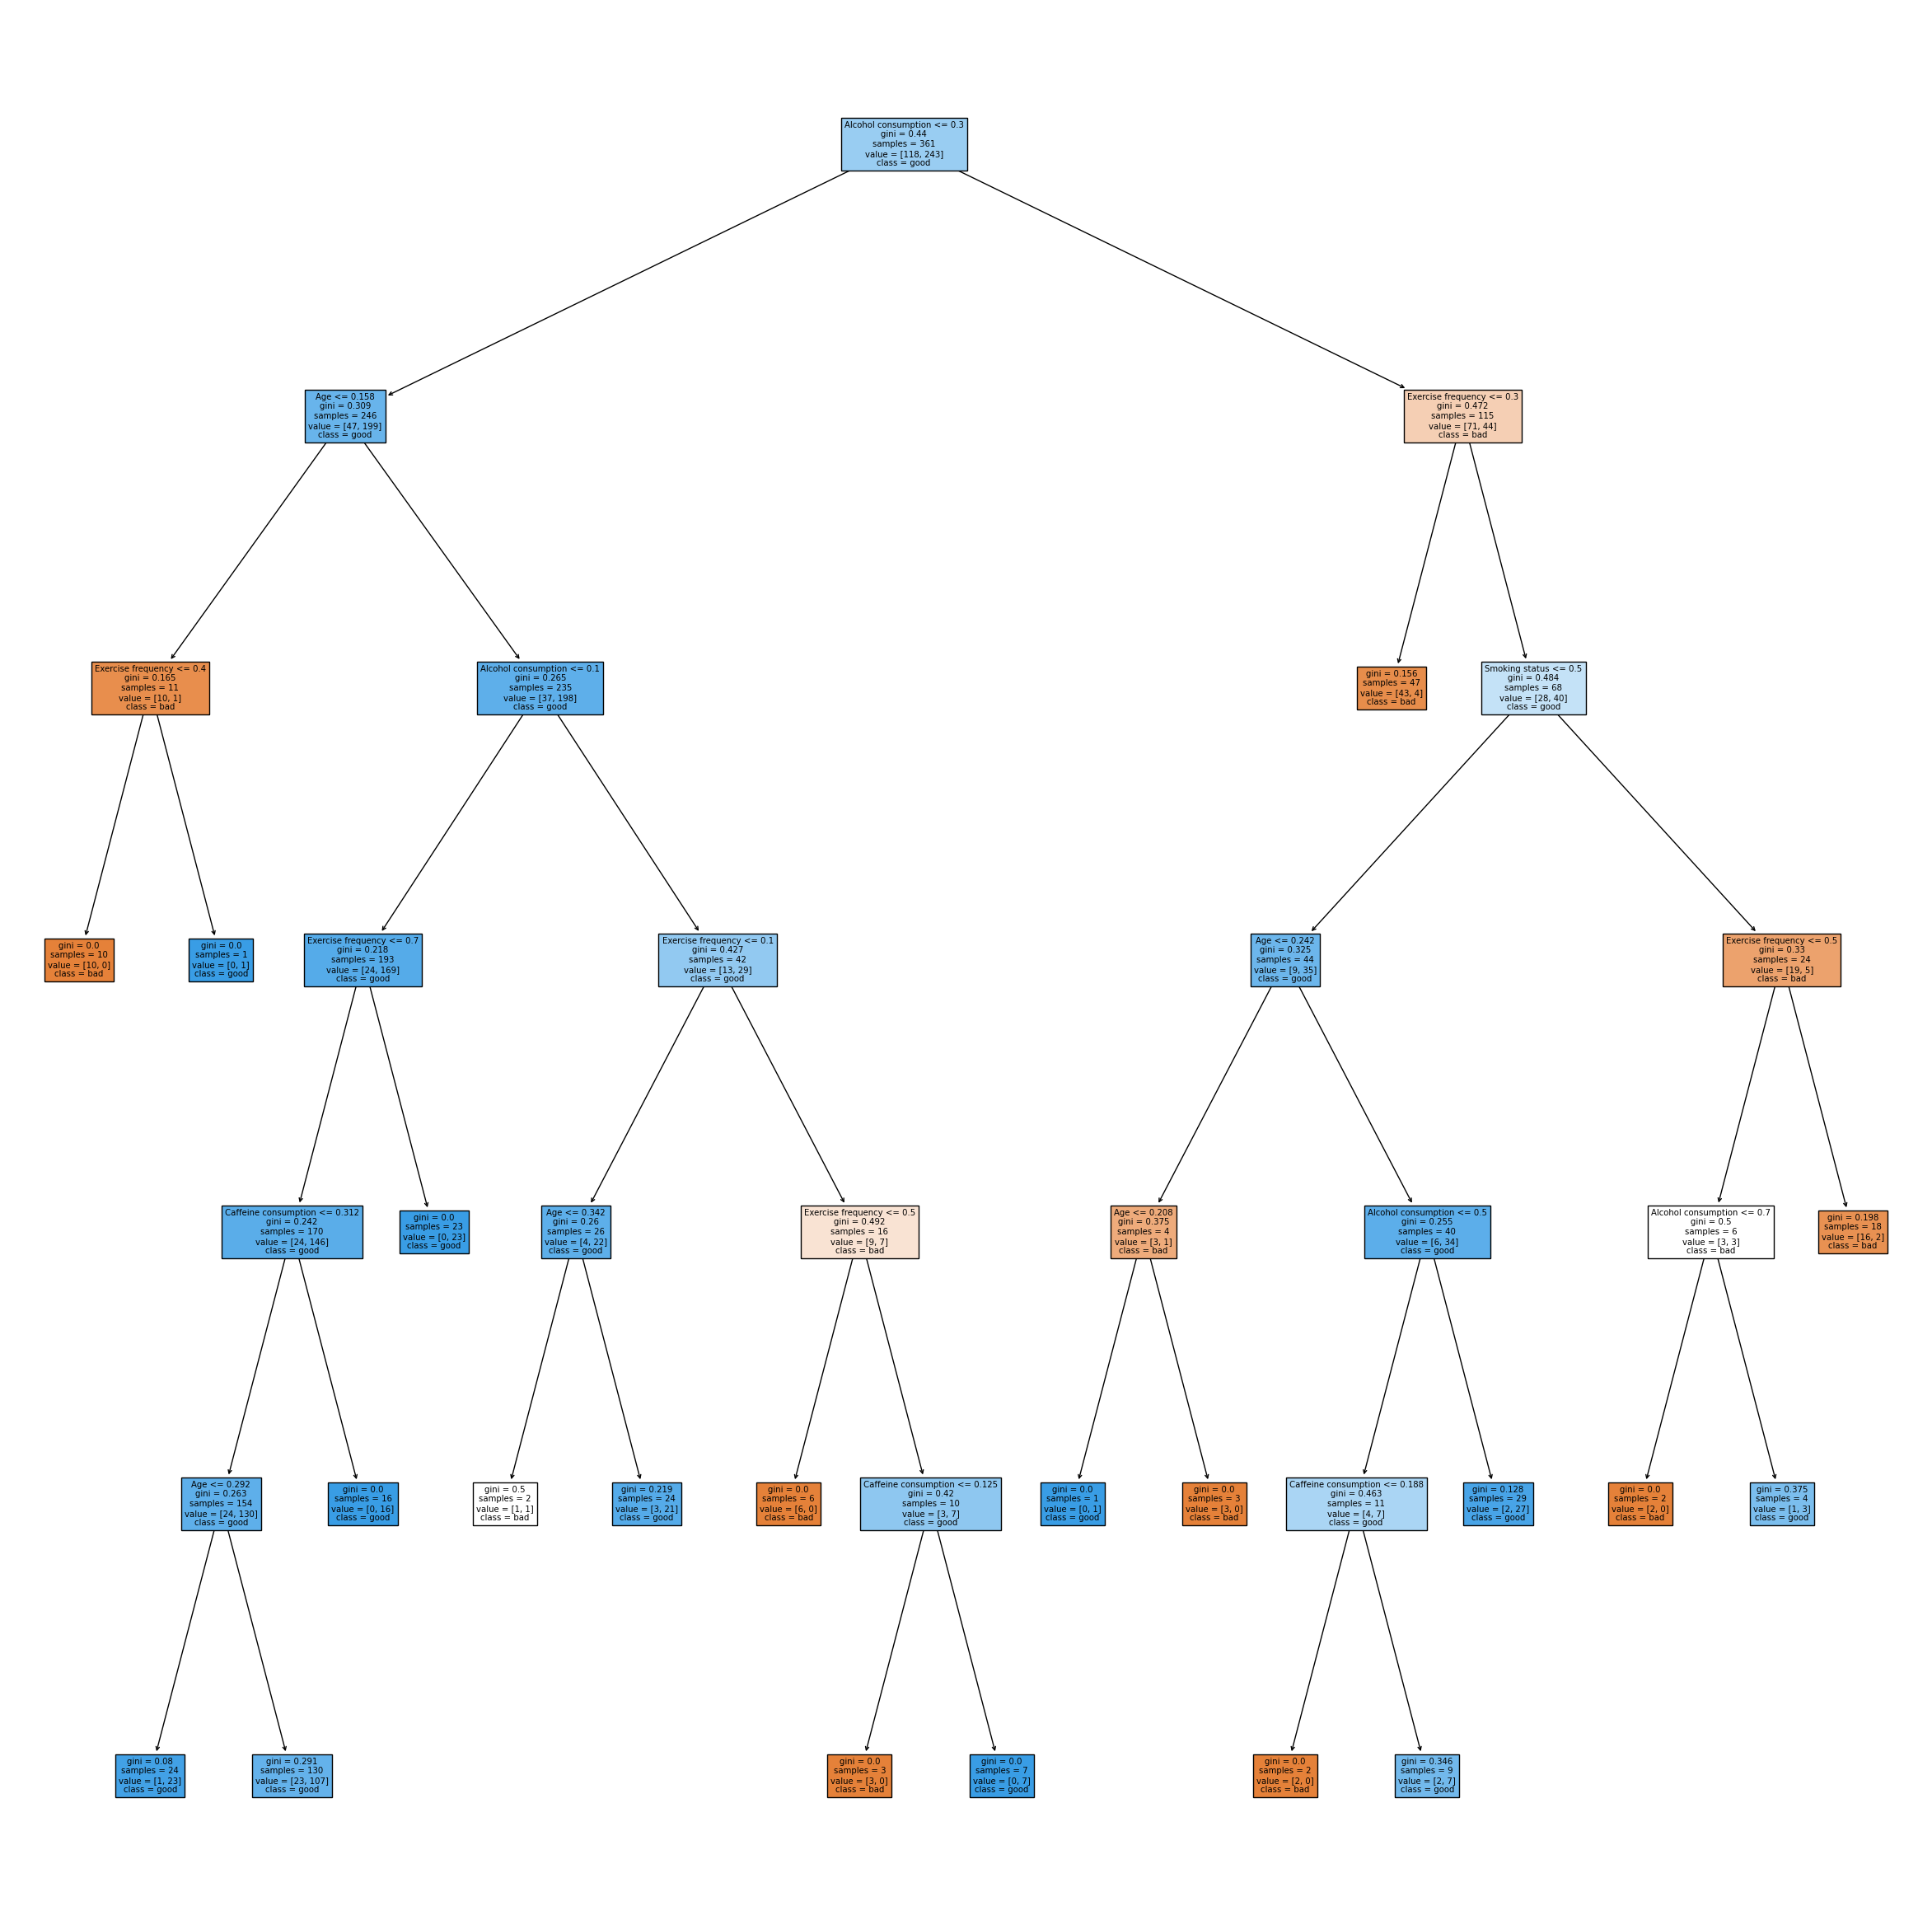

In [191]:
#Making graph for Decision Tree Classifier with best features and parameters 
df_categorical = df_scaled.copy()
bins = [0, 0.74, 1]
labels = [0, 1] #0: bad & 1: good
df_categorical['sleep_efficiency_group'] = pd.cut(df_categorical['Sleep efficiency'], bins, labels = labels, include_lowest = True)
X = df_categorical[['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']]
y = df_categorical['sleep_efficiency_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

parameters = best_params_dt_classifier['params']

clf = DecisionTreeClassifier(criterion= parameters['criterion'], max_depth= parameters['max_depth'], max_features= parameters['max_features'], max_leaf_nodes= parameters['max_leaf_nodes'], 
                             min_samples_leaf= parameters['min_samples_leaf'], splitter= parameters['splitter'])
clf = clf.fit(X_train, y_train)
y_pred_cat = clf.predict(X_test)

plt.figure(figsize=(30, 30)) # Resize figure
cn = ["bad", "good"]
fn = ['Age','Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
tree.plot_tree(clf, 
               feature_names = fn,
               class_names=cn, 
               filled=True)
plt.show()